In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
#Exercício: 1

caminho_arquivo = '/content/drive/MyDrive/IOT_CP1/household_power_consumption.txt'

df1 = pd.read_csv(caminho_arquivo, sep=';', low_memory=False)

df1.head(10)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


--EXERCÍCIO 2

**Global_active_power (Potência Ativa Global):**

*   Representa a energia real que está sendo consumida pelos aparelhos elétricos para realizar trabalho útil (por exemplo, acender uma lâmpada, ligar um motor).
*   É a potência que é convertida em outras formas de energia, como calor, luz ou movimento.
*   É medida em quilowatts (kW).
*   É a energia pela qual você geralmente é cobrado na sua conta de eletricidade.

**Global_reactive_power (Potência Reativa Global):**

*   Representa a energia que circula entre a fonte de alimentação e as cargas reativas (como motores e transformadores) para manter os campos magnéticos e elétricos necessários para o seu funcionamento.
*   Não realiza trabalho útil diretamente, mas é necessária para o funcionamento de certos tipos de equipamentos.
*   É medida em quilovolt-ampères reativos (kVAr).
*   Uma alta potência reativa pode levar a ineficiências no sistema de distribuição de energia.

Em resumo, a **Potência Ativa** é a energia que você realmente usa para realizar trabalho, enquanto a **Potência Reativa** é a energia necessária para operar certos tipos de equipamentos, mas que não é convertida em trabalho útil. A soma vetorial da potência ativa e reativa é a **Potência Aparente**.

In [4]:
#Exercício: 3

nulo = df1.isnull().sum().sum()
print(f'Quantidade de valores vazios: {nulo}')

Quantidade de valores vazios: 25979


In [5]:
#Exercício: 4

df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

/tmp/ipython-input-514029118.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'])


,0
Date,datetime64[ns]
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [6]:
#Exercício: 5

df1['Global_active_power']  = pd.to_numeric(df1['Global_active_power'], errors='coerce')

dffiltro = df1[df1['Date'].dt.year == 2007]
media = dffiltro['Global_active_power'].mean()
print(f'Média de Global_active_power em 2007: {media}')

Média de Global_active_power em 2007: 1.117007500924916


/tmp/ipython-input-2187607401.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "Date": pd.date_range('2007-03-03', periods=23, freq='H'),


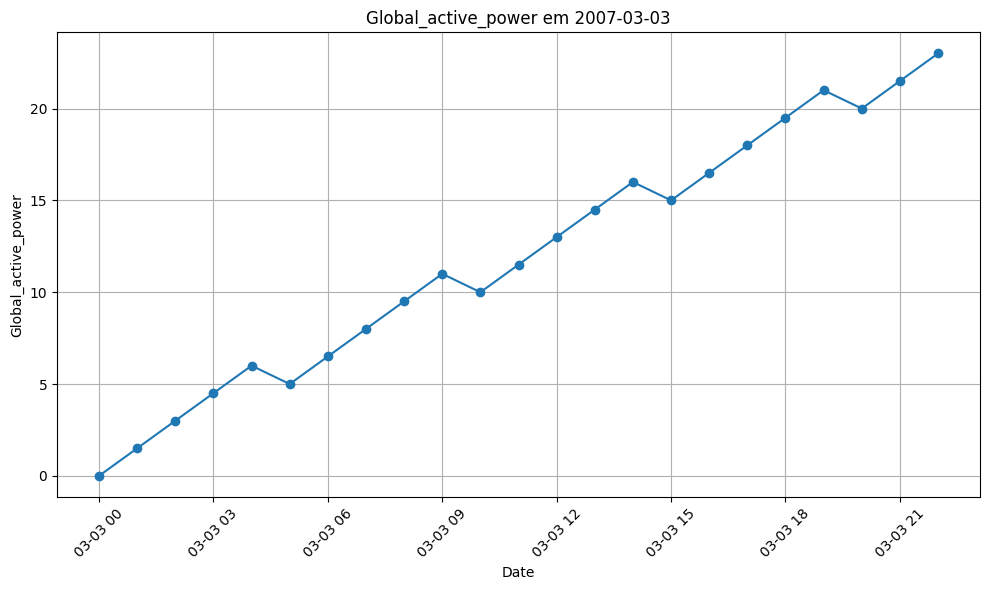

In [7]:
#Exercício: 6

df_line = df1

df_line = pd.DataFrame ({
    "Date": pd.date_range('2007-03-03', periods=23, freq='H'),
    "Global_active_power": [i+ (i%5) * 0.5 for i in range(23)]
})

dia = '2007-03-03'
df_dia = df_line[df_line['Date'].dt.date == pd.to_datetime(dia).date()]

plt.figure(figsize=(10, 6))
plt.plot(df_dia['Date'], df_dia['Global_active_power'], marker='o', linestyle='-')
plt.title(f'Global_active_power em {dia}')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

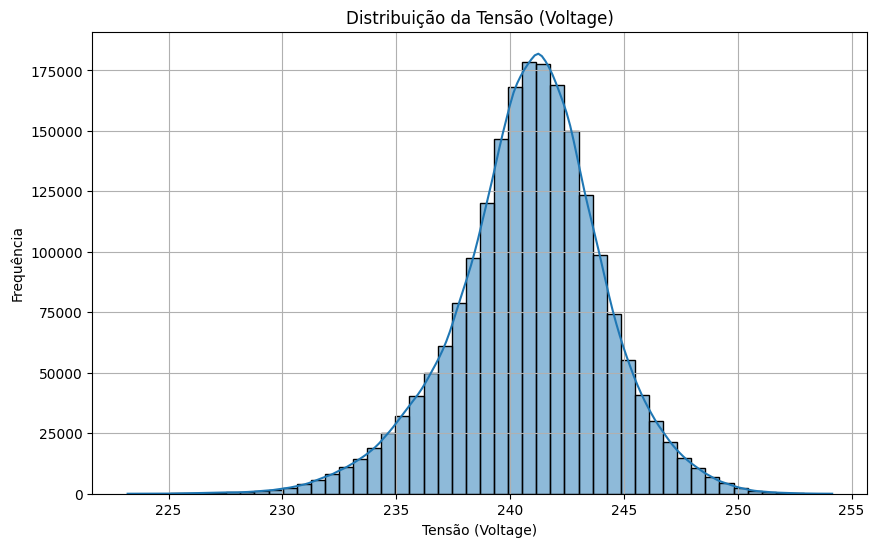

In [8]:
#Exercício: 7

df3 = df1

df3['Voltage'] = pd.to_numeric(df3['Voltage'], errors='coerce')
df3.dropna(subset=['Voltage'], inplace=True)

plt.figure(figsize=(10, 6))

sns.histplot(df3['Voltage'], bins=50, kde=True)
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Tensão (Voltage)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()




A maioria dos valores de tensão se concentra em torno da média, com a frequência diminuindo gradualmente à medida que nos afastamos do centro. Isso sugere que a tensão no conjunto de dados tende a flutuar em torno de um valor central com menos ocorrências de valores muito altos ou muito baixos.

In [9]:
#Exercício: 8

media_mensal = df1.groupby(df1['Date'].dt.month)['Global_active_power'].mean()

media_mensal = media_mensal.reset_index()
media_mensal.columns = ['Mês', 'Media_Mensal']

mapa_mes = {1:"Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"}

media_mensal['Mês'] = media_mensal['Mês'].map(mapa_mes)

print(media_mensal)

          Mês  Media_Mensal
0     Janeiro      1.462226
1   Fevereiro      1.300431
2       Março      1.231343
3       Abril      1.047146
4        Maio      1.029571
5       Junho      0.909148
6       Julho      0.700359
7      Agosto      0.572812
8    Setembro      0.975653
9     Outubro      1.137141
10   Novembro      1.291532
11   Dezembro      1.489729


In [10]:
#Exercício: 9

consumo_dia = df1.groupby(df1['Date'].dt.date)['Global_active_power'].sum()

cosumo_max = consumo_dia.idxmax()
dia_max = consumo_dia.max()

print(f'Dia com maior consumo: {cosumo_max}')
print(f'Consumo no dia: {dia_max}')

Dia com maior consumo: 2006-12-23
Consumo no dia: 4773.386


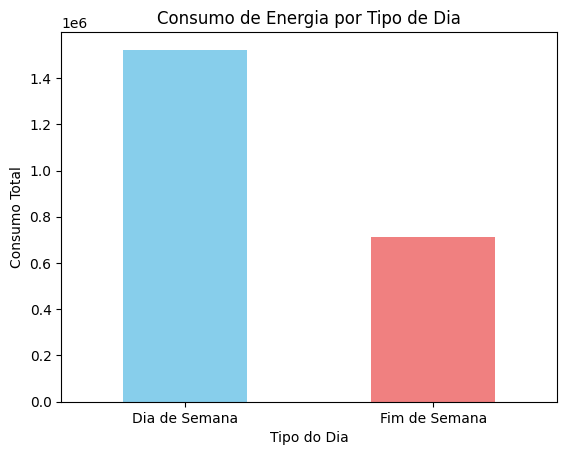

Tipo do Dia
Dia de Semana    1522587.098
Fim de Semana     714437.764
Name: Global_active_power, dtype: float64


In [11]:
#Exercício: 10

df1['Dia_Semana'] = df1['Date'].dt.dayofweek

df1['Tipo do Dia'] = df1['Dia_Semana'].apply(lambda x: 'Dia de Semana' if x < 5 else 'Fim de Semana')

consumo_dia_semana = df1.groupby('Tipo do Dia')['Global_active_power'].sum()

consumo_dia_semana.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Consumo de Energia por Tipo de Dia')
plt.ylabel('Consumo Total')
plt.xticks(rotation=0)
plt.show()

print(consumo_dia_semana)

In [12]:
#Exercício: 11

colunas_numericas = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity"
]

df_subset = df1[colunas_numericas].apply(pd.to_numeric, errors='coerce')

df_correla = df_subset.corr()

print(df_correla)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


In [13]:
#Exercício: 12

df1['Sub_metering_1'] = pd.to_numeric(df1['Sub_metering_1'], errors='coerce')
df1['Sub_metering_2'] = pd.to_numeric(df1['Sub_metering_2'], errors='coerce')
df1['Sub_metering_3'] = pd.to_numeric(df1['Sub_metering_3'], errors='coerce')

df1["Total_Sub_metering"] = (
    df1["Sub_metering_1"] +
    df1["Sub_metering_2"] +
    df1["Sub_metering_3"]
)

df1["Total_Sub_metering"]

,Total_Sub_metering
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0
...,...
2075254,0.0
2075255,0.0
2075256,0.0
2075257,0.0


In [14]:
#Exercício: 13
media_global_active_power = df1["Global_active_power"].mean()

df1['Month'] = df1["Date"].dt.month

media_mensal = df1.groupby("Month")["Total_Sub_metering"].mean()

meses_ultrapassados = media_mensal[media_mensal > media_global_active_power]

mapa_mes = {1:"Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"}

meses_ultrapassados = meses_ultrapassados.reset_index()
meses_ultrapassados['Month'] = meses_ultrapassados['Month'].map(mapa_mes)


print("\nMeses em que a média mensal é superior à média global:")
print(meses_ultrapassados)


Meses em que a média mensal é superior à média global:
        Month  Total_Sub_metering
0     Janeiro           10.749374
1   Fevereiro           10.106044
2       Março            9.856913
3       Abril            8.927079
4        Maio            9.239570
5       Junho            8.747352
6       Julho            5.975636
7      Agosto            5.170673
8    Setembro            8.697096
9     Outubro            9.133621
10   Novembro            9.611881
11   Dezembro           10.560191


/tmp/ipython-input-3042709418.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  voltagem_mensal = dados_2008.resample('M', on='Date')['Voltage'].mean()


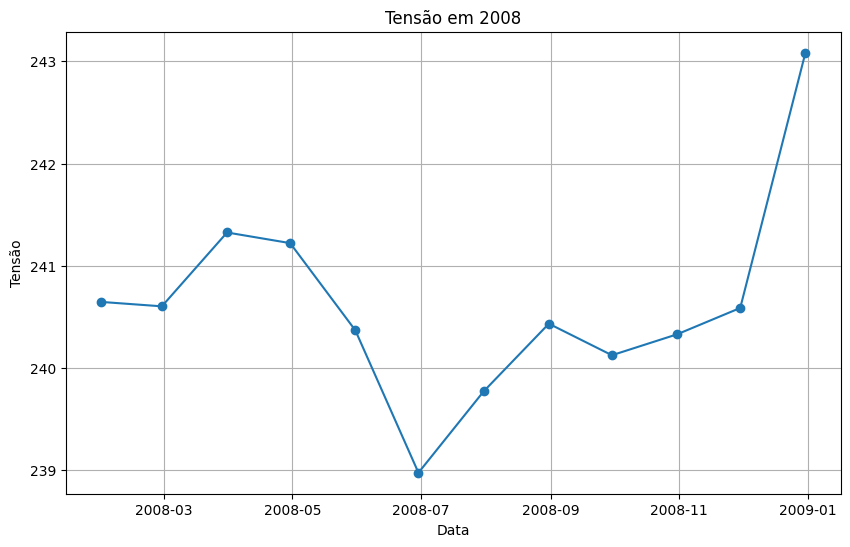

In [15]:
#Exercício: 14

df1["Voltage"] = pd.to_numeric(df1["Voltage"], errors="coerce")

dados_2008 = df1[df1['Date'].dt.year == 2008]

voltagem_mensal = dados_2008.resample('M', on='Date')['Voltage'].mean()



plt.figure(figsize=(10, 6))
plt.plot(voltagem_mensal.index, voltagem_mensal.values, marker='o', linestyle='-')
plt.title('Tensão em 2008')
plt.xlabel('Data')
plt.ylabel('Tensão')
plt.grid(True)
plt.show()

Estacao
Inverno    5175126.0
Outro      9590611.0
Verão      3429596.0
Name: Total_Sub_metering, dtype: float64


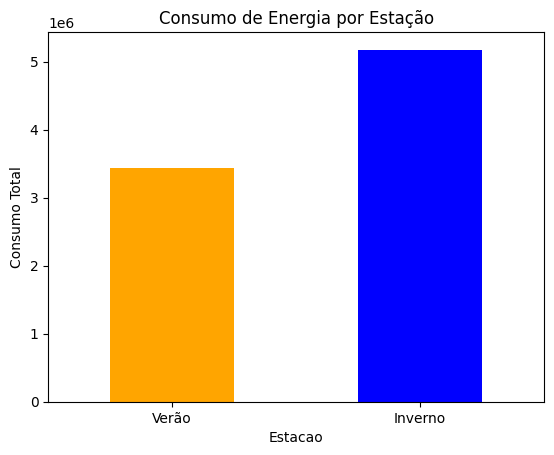

In [16]:
#Exercício: 15

df1['Month'] = df1['Date'].dt.month

def estacao(month):
  if month in [12, 1, 2]:
    return 'Inverno'
  elif month in [6, 7, 8]:
    return 'Verão'
  else:
    return 'Outro'

df1['Estacao'] = df1['Month'].apply(estacao)

consumo_estacao = df1.groupby('Estacao')['Total_Sub_metering'].sum()

print(consumo_estacao)

consumo_estacao[['Verão', 'Inverno']].plot(kind='bar', color=['orange', 'blue'])
plt.title('Consumo de Energia por Estação')
plt.ylabel('Consumo Total')
plt.xticks(rotation=0)
plt.show()

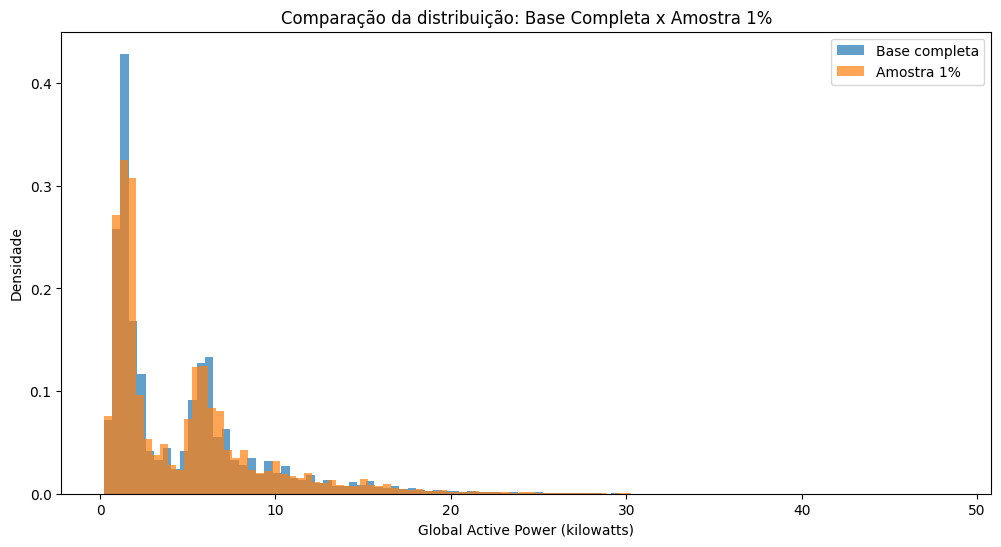

In [17]:
#Exercício: 16
df1['Global_intensity'] = pd.to_numeric(df1['Global_intensity'], errors='coerce')


amostra = df1.sample(frac=0.1, random_state=42)

plt.figure(figsize=(12, 6))

df1['Global_intensity'].plot(kind='hist', bins=100, alpha=0.7, label='Base completa', density=True)

amostra['Global_intensity'].plot(kind='hist', bins=100, alpha=0.7, label='Amostra 1%', density=True)

plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Densidade')
plt.legend()
plt.title('Comparação da distribuição: Base Completa x Amostra 1%')
plt.show()


In [18]:
#Exercício: 17

colunas_numericas = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

for col in colunas_numericas:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

scale = MinMaxScaler()
df1[colunas_numericas] = scale.fit_transform(df1[colunas_numericas])

df1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_Semana,Tipo do Dia,Total_Sub_metering,Month,Estacao
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,5,Fim de Semana,18.0,12,Inverno
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,5,Fim de Semana,17.0,12,Inverno
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,5,Fim de Semana,19.0,12,Inverno
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,5,Fim de Semana,18.0,12,Inverno
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,5,Fim de Semana,18.0,12,Inverno


Cluster
0    669
2    386
1    378
Name: count, dtype: int64


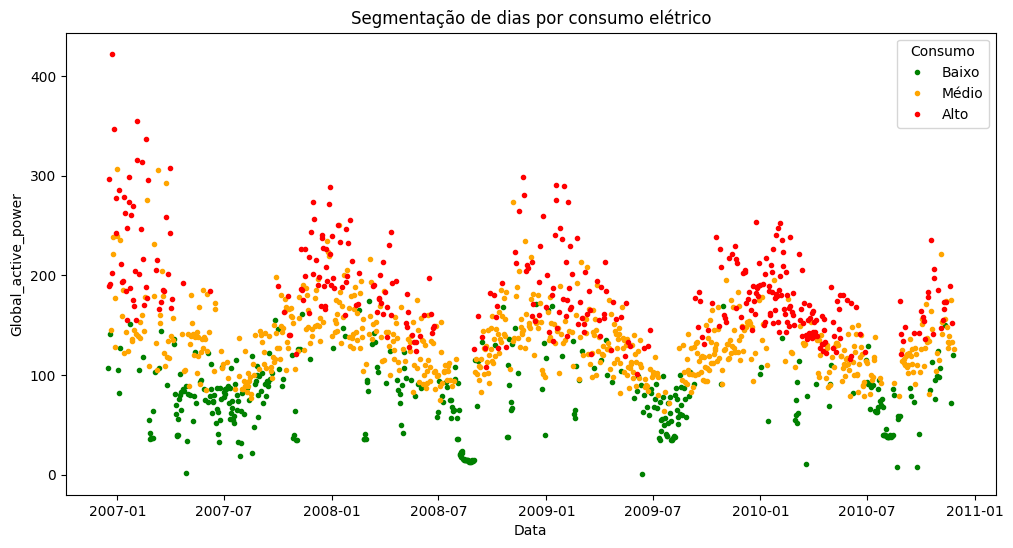

In [19]:
#Exercício: 18

df1['Date'] = pd.to_datetime(df1['Date'])

df_diario = df1.groupby('Date').agg({
    'Global_active_power': 'sum',
    'Global_reactive_power': 'sum',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
}).reset_index()

x = df_diario.drop('Date', axis=1)

x_filed = x.fillna(x.mean())

k_means = KMeans(n_clusters=3, random_state=42)

df_diario['Cluster'] = k_means.fit_predict(x_filed)

print(df_diario['Cluster'].value_counts())

cluster_ordem = df_diario.groupby('Cluster')['Global_active_power'].mean().sort_values()
cluster_labels = {cluster_ordem.index[0]: 'Baixo', cluster_ordem.index[1]: 'Médio', cluster_ordem.index[2]: 'Alto'}

df_diario['Cluster_Label'] = df_diario['Cluster'].map(cluster_labels)

plt.figure(figsize=(12,6))
colors = {'Baixo':'green', 'Médio':'orange', 'Alto':'red'}

for label in ['Baixo','Médio','Alto']:
    subset = df_diario[df_diario['Cluster_Label']==label]
    plt.plot(subset['Date'], subset['Global_active_power'], '.', color=colors[label], label=label)

plt.xlabel('Data')
plt.ylabel('Global_active_power')
plt.title('Segmentação de dias por consumo elétrico')
plt.legend(title='Consumo')
plt.show()

Resumo do gráfico de segmentação por consumo:

Clusters de consumo:

- Verde (Baixo): Dias de menor consumo.

- Laranja (Médio): Dias de consumo intermediário, a maioria.

- Vermelho (Alto): Dias de maior consumo, mais raros.

Padrão temporal:

 - Há picos e vales recorrentes, indicando sazonalidade.

- Picos altos aparecem em períodos semelhantes todos os anos, possivelmente ligados a estações ou dias específicos.

Distribuição:

- Maioria dos dias está no cluster médio.

- Dias de alto consumo são menos frequentes; dias de baixo consumo ocorrem em feriados, finais de semana ou meses de menor demanda.

Conclusão:
- O K-means segmentou de forma coerente baixo, médio e alto consumo.

- A segmentação ajuda a identificar dias críticos, otimizar energia e planejar manutenção ou ações de eficiência.

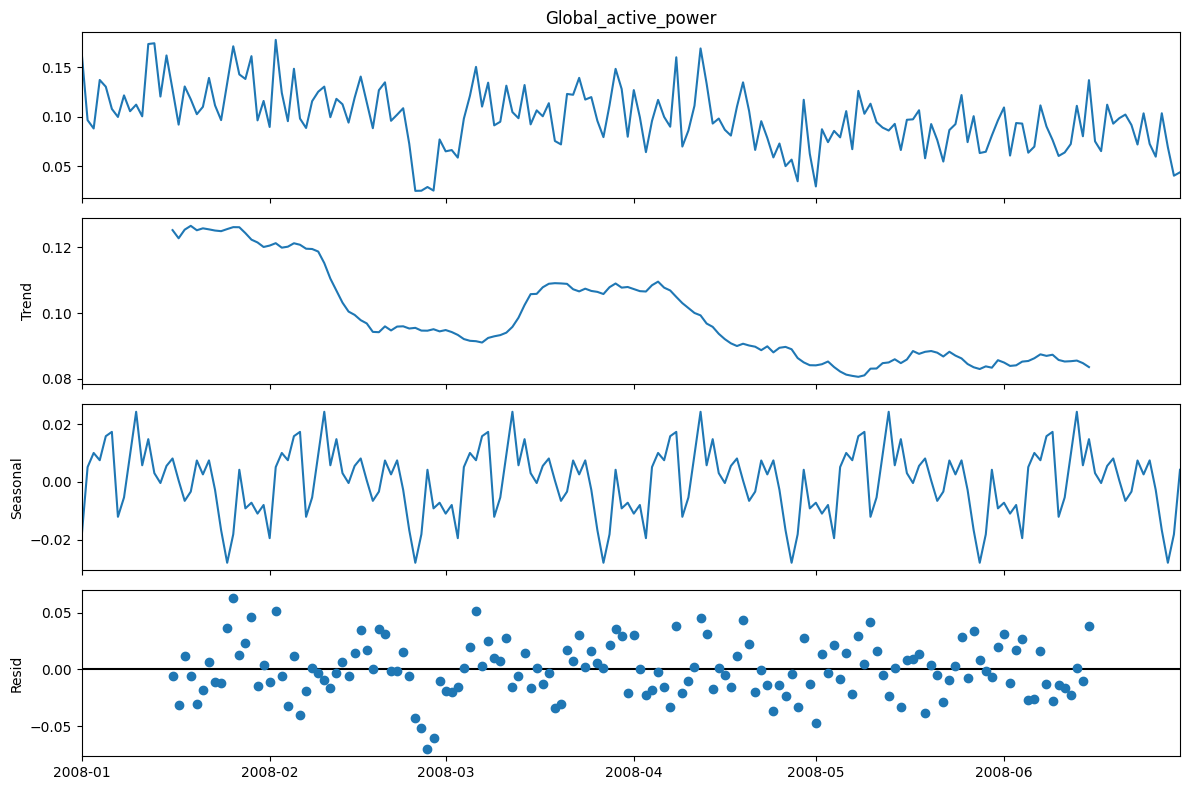

In [20]:
#Exercício: 19


periodo = df1[(df1['Date'] >= '2008-01-01') & (df1['Date'] < '2008-07-01')]

serie_diaria = periodo.groupby('Date')['Global_active_power'].mean()

decomposicao = seasonal_decompose(serie_diaria, model='additive', period=31)

plt.rcParams['figure.figsize'] = (12, 8)
decomposicao.plot()
plt.show()




Erro Quadrático Médio (MSE): 2.0214891860825585e-05
Raiz do Erro Quadrático Médio (RMSE): 0.004496097403396148
Coeficiente de Determinação (R²): 0.9977990793633297


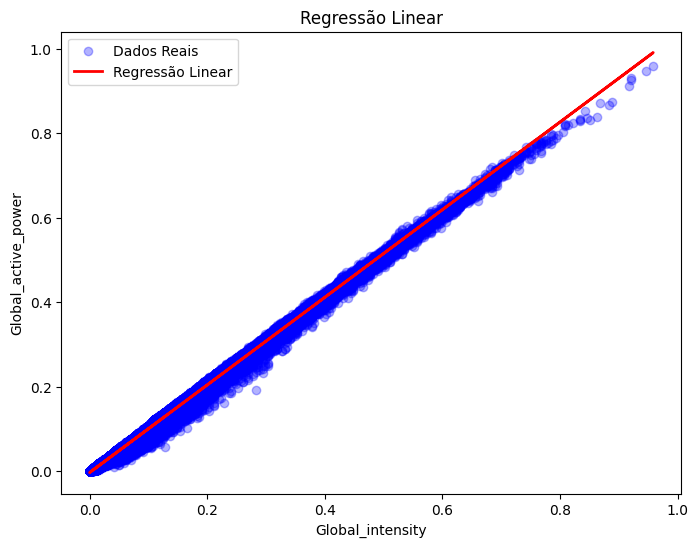

In [21]:
#Exercício: 20

df_reg = df1[['Global_intensity', 'Global_active_power']].dropna()

x = df_reg[['Global_intensity']]
y = df_reg['Global_active_power']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Coeficiente de Determinação (R²):", r2)

plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', alpha=0.3, label='Dados Reais')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.title('Regressão Linear')
plt.legend()
plt.show()

/tmp/ipython-input-1419592200.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hora = df_new['Global_active_power'].resample('H').mean()


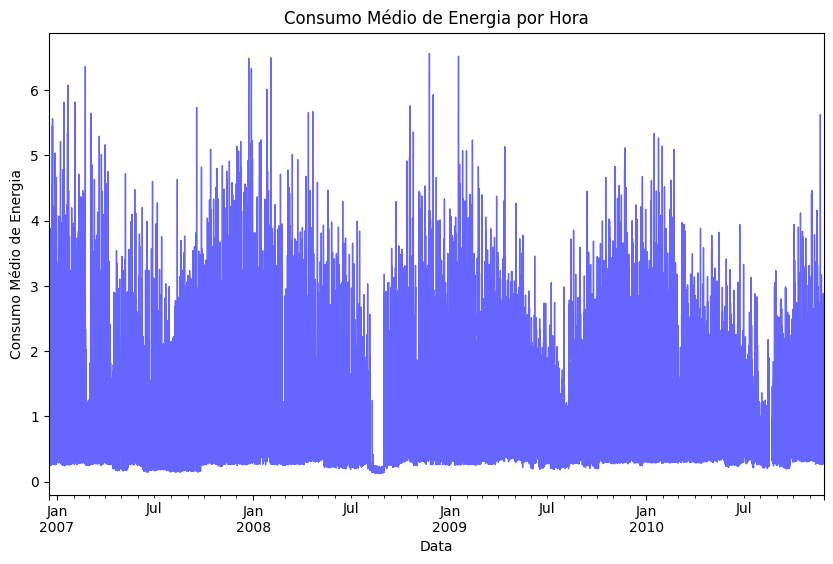

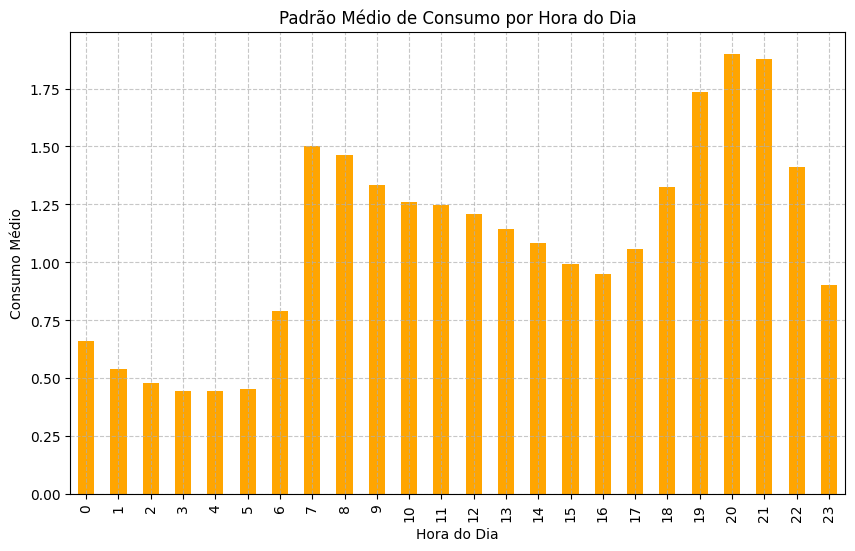

As 5 horas com maior consumo médio são:
DateTime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
Name: Global_active_power, dtype: float64


In [22]:
#Exercício: 21

df_new = pd.read_csv(caminho_arquivo, sep=';', low_memory=False)

df_new['DateTime'] = pd.to_datetime(df_new['Date'] + '' + df_new['Time'], format='%d/%m/%Y%H:%M:%S')
df_new.set_index('DateTime', inplace=True)

df_new['Global_active_power'] = pd.to_numeric(df_new['Global_active_power'], errors='coerce')

df_hora = df_new['Global_active_power'].resample('H').mean()

hora_dia = df_hora.groupby(df_hora.index.hour).mean()

plt.figure(figsize=(10, 6))
df_hora.plot(color='blue', alpha=0.6, linewidth=1)
plt.title('Consumo Médio de Energia por Hora')
plt.xlabel('Data')
plt.ylabel('Consumo Médio de Energia')
plt.show()

plt.figure(figsize=(10, 6))
hora_dia.plot(kind='bar', color='orange')
plt.title('Padrão Médio de Consumo por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Consumo Médio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

top_hora = hora_dia.sort_values(ascending=False).head(5)
print('As 5 horas com maior consumo médio são:')
print(top_hora)

/tmp/ipython-input-299646699.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series_hora = df_new.set_index("DateTime")["Global_active_power"].resample("H").mean()


Autocorrelação (1h): 0.769
Autocorrelação (24h): 0.36
Autocorrelação (48h): 0.385


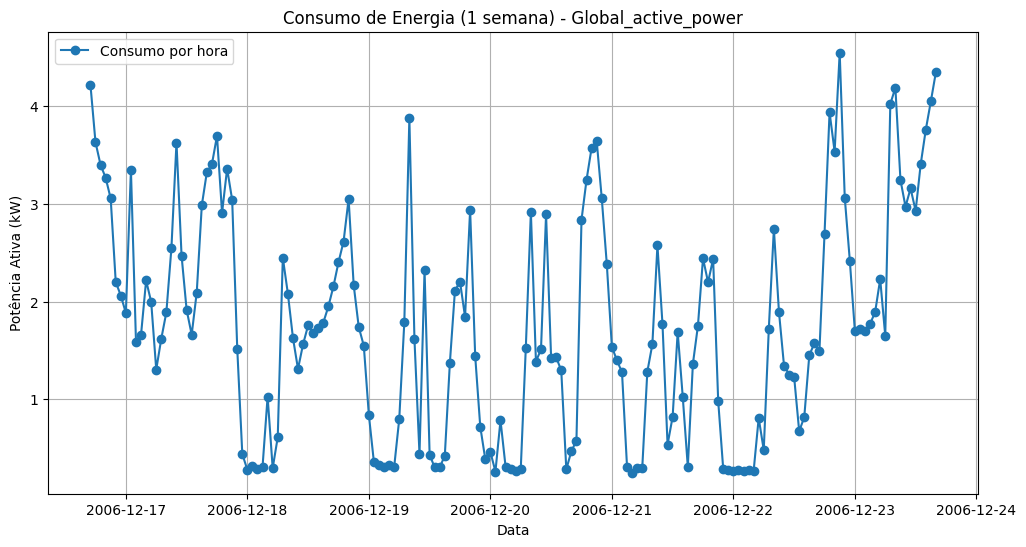

In [23]:
#Exercício: 22

df_new = df_new.dropna(subset=["Global_active_power"])

df_new["DateTime"] = pd.to_datetime(df_new["Date"] + " " + df_new["Time"], format="%d/%m/%Y %H:%M:%S")

series_hora = df_new.set_index("DateTime")["Global_active_power"].resample("H").mean()

semana = series_hora.iloc[:24*7]


autocorr_1h = semana.autocorr(lag=1)
autocorr_24h = semana.autocorr(lag=24)
autocorr_48h = semana.autocorr(lag=48)

print("Autocorrelação (1h):", round(autocorr_1h, 3))
print("Autocorrelação (24h):", round(autocorr_24h, 3))
print("Autocorrelação (48h):", round(autocorr_48h, 3))


plt.figure(figsize=(12,6))
plt.plot(semana.index, semana.values, marker="o", linestyle="-", label="Consumo por hora")
plt.title("Consumo de Energia (1 semana) - Global_active_power")
plt.ylabel("Potência Ativa (kW)")
plt.xlabel("Data")
plt.legend()
plt.grid(True)
plt.show()

Sim. A análise da autocorrelação da série temporal de Global_active_power mostra padrões repetidos diariamente, com forte correlação em defasagens de 24 horas. Isso indica que o consumo de energia segue uma rotina diária bem definida, repetindo-se em ciclos diários.

In [24]:
#Exercício: 23

coluns = ["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity"]

X = df_new[coluns]
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

varianca = pca.explained_variance_ratio_

print("Variância explicada por cada componente:")
print(f"Componente 1: {varianca[0]*100:.2f}%")
print(f"Componente 2: {varianca[1]*100:.2f}%")
print(f"Variância total explicada: {varianca.sum()*100:.2f}%")

Variância explicada por cada componente:
Componente 1: 59.10%
Componente 2: 22.72%
Variância total explicada: 81.82%


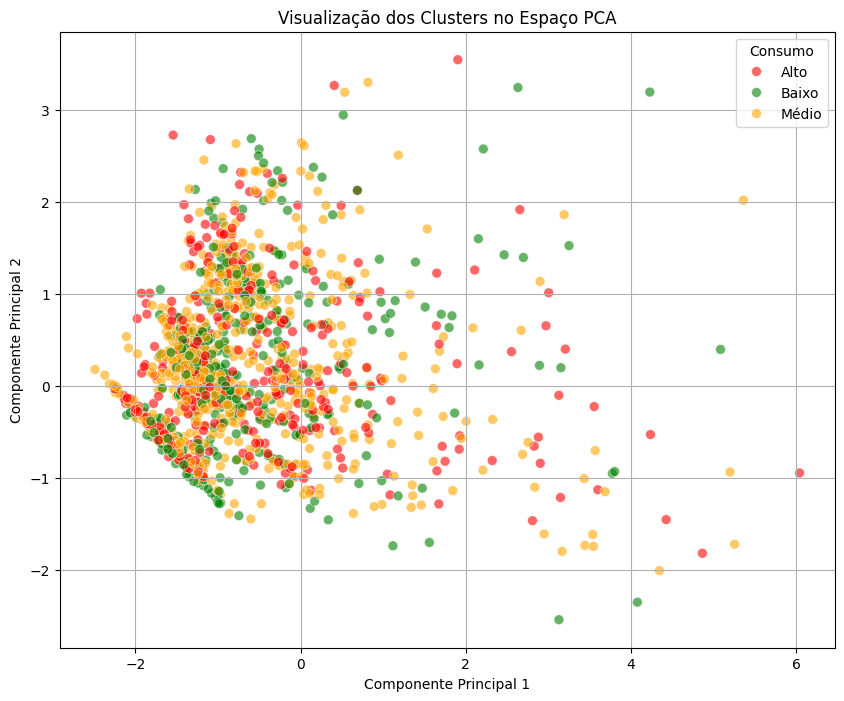

In [25]:
#Exercício: 24

df_new_pca = df_new.copy()
df_new_pca = df_new_pca[coluns].apply(pd.to_numeric, errors='coerce').dropna()

df_new_pca['PCA1'] = X_pca[:, 0]
df_new_pca['PCA2'] = X_pca[:, 1]



df_new_pca = df_new_pca.merge(df_diario[['Date', 'Cluster_Label']], left_index=True, right_on='Date', how='left')


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Label', data=df_new_pca, palette=colors, s=50, alpha=0.6)

plt.title('Visualização dos Clusters no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Consumo')
plt.grid(True)
plt.show()

Olhando para o gráfico de dispersão, os clusters estão um pouco separados no espaço PCA, mas também há alguma sobreposição, particularmente entre os clusters de consumo 'Baixo' (Verde) e 'Médio' (Laranja). O cluster de consumo 'Alto' (Vermelho) parece ser mais distinto, mas ainda existem alguns pontos que se sobrepõem aos outros clusters.


Resultados da Regressão
RMSE - Linear:     0.9708
RMSE - Polinomial: 0.9664


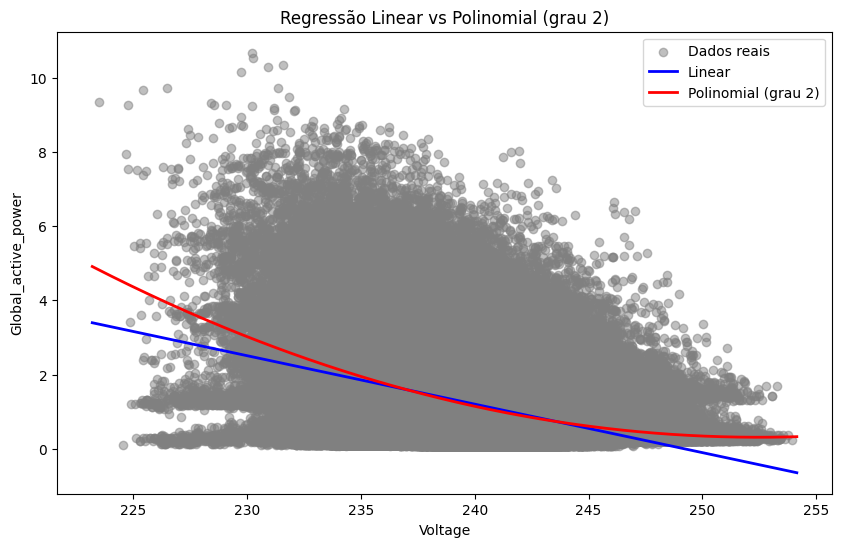

In [26]:
#Exercício: 25

X = df_new[['Voltage']].astype(float).values   # garante float
y = df_new['Global_active_power'].astype(float).values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))


print("\nResultados da Regressão")
print(f"RMSE - Linear:     {rmse_lin:.4f}")
print(f"RMSE - Polinomial: {rmse_poly:.4f}")


plt.figure(figsize=(10,6))


plt.scatter(X_test.ravel(), y_test, color="gray", alpha=0.5, label="Dados reais")


X_range = np.linspace(float(X.min()), float(X.max()), 300).reshape(-1,1)


y_lin_curve = lin_reg.predict(X_range)
plt.plot(X_range, y_lin_curve, color="blue", linewidth=2, label="Linear")


X_range_poly = poly.transform(X_range)
y_poly_curve = poly_reg.predict(X_range_poly)
plt.plot(X_range, y_poly_curve, color="red", linewidth=2, label="Polinomial (grau 2)")


plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.title("Regressão Linear vs Polinomial (grau 2)")
plt.legend()
plt.show()


##Com base nos resultados do Exercício 25:

**Análise do RMSE:**

Neste caso, o modelo de Regressão Polinomial (grau 2) tem um RMSE ligeiramente menor (0.9664) do que o modelo de Regressão Linear (0.9708). Isso sugere que o modelo polinomial teve um desempenho marginalmente melhor na previsão do Global_active_power com base na Voltage neste conjunto de dados.

**Análise da Curva Ajustada:**

A linha azul representa a Regressão Linear. Como esperado, é uma linha reta tentando capturar a relação entre Voltage e Global_active_power.
A linha vermelha representa a Regressão Polinomial (grau 2). Esta curva é parabólica, o que permite capturar uma relação não linear entre as variáveis.
Observando o gráfico, a curva polinomial (vermelha) parece se ajustar um pouco melhor à distribuição dos dados reais do que a linha reta da regressão linear (azul), especialmente nas extremidades da faixa de Voltage. Isso visualmente corrobora a ligeira melhora no RMSE observada para o modelo polinomial.

In [27]:
#Exercício: 26

caminho_arquivo_2 = '/content/drive/MyDrive/IOT_CP1/energydata_complete.csv'

df2 = pd.read_csv(caminho_arquivo_2, low_memory=False)

print('Estatísticas')
df2.info()

print('\n Descritivas')
display(df2.describe())


Estatísticas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  floa

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


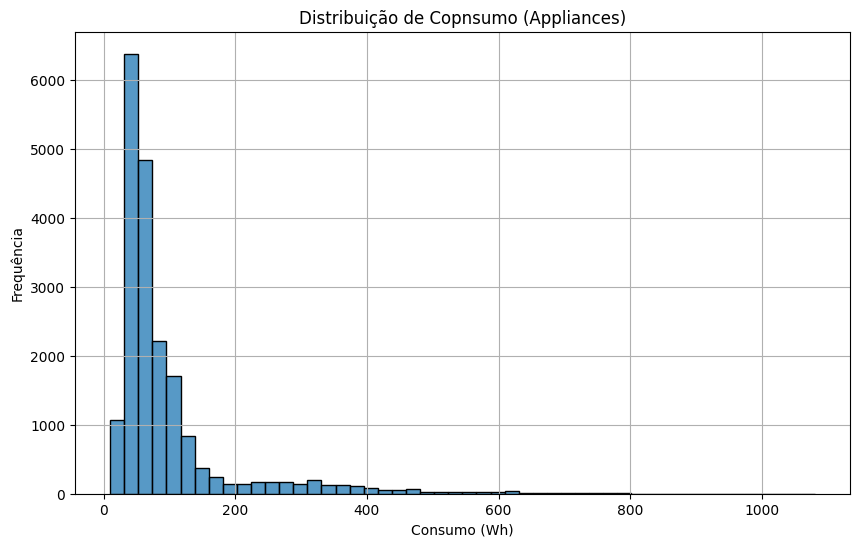

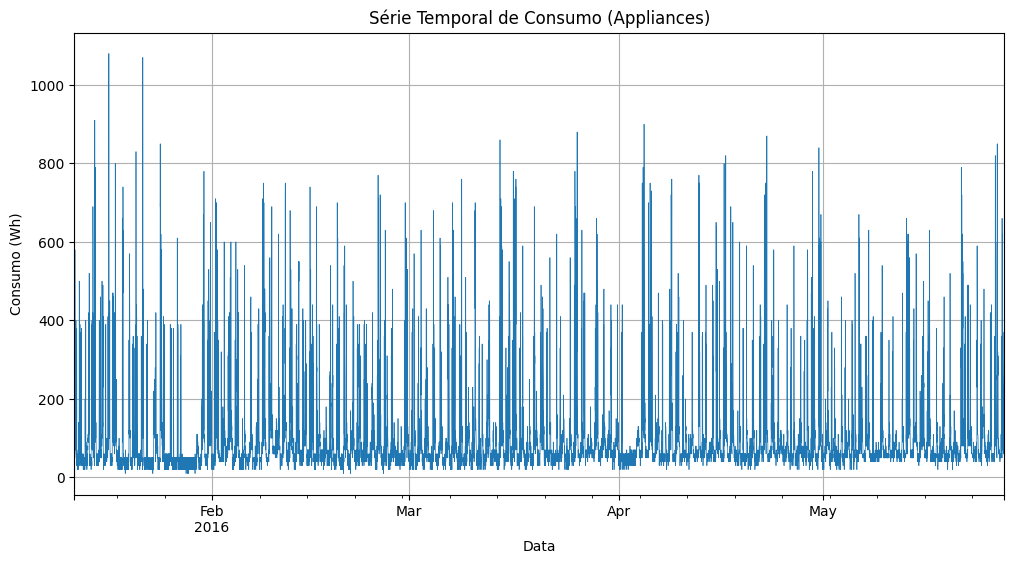

In [28]:
#Exercício: 27

plt.figure(figsize=(10, 6))
sns.histplot(df2['Appliances'], bins=50)
plt.title('Distribuição de Copnsumo (Appliances)')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
df2['Appliances'].plot(linewidth=0.5)
plt.title('Série Temporal de Consumo (Appliances)')
plt.xlabel('Data')
plt.ylabel('Consumo (Wh)')
plt.grid(True)
plt.show()


O histograma mostra que a maioria dos valores de consumo se concentra em valores mais baixos, com picos significativos. A distribuição é assimétrica à direita, indicando que a frequência de altos consumos é menor.

A série temporal mostra a variação do consumo ao longo do tempo. Podemos observar padrões diários e semanais, com picos recorrentes que correspondem aos períodos de maior uso dos eletrodomésticos. No entanto, a maior parte do tempo o consumo se mantém em níveis mais baixos, conforme visto no histograma.

Portanto, o consumo tende a se concentrar em valores baixos, embora existam períodos de picos de alto consumo.

In [29]:
#Exercício: 28

colunas_correlacao = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

df_correlacao = df2[colunas_correlacao].corr()

print("Correlações com a variável 'Appliances':")
print(df_correlacao['Appliances'].sort_values(ascending=False))

Correlações com a variável 'Appliances':
Appliances     1.000000
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


Com base na análise de correlação, as variáveis que apresentam maior relação com o consumo são:

- T2: Temperatura na sala de estar (correlação de 0.120073)

- T6: Temperatura fora do edifício (sensoreada por uma estação meteorológica próxima) (correlação de 0.117638)

- T_out: Temperatura externa (da estação meteorológica) (correlação de 0.099155)
Windspeed: Velocidade do vento (da estação meteorológica) (correlação de 0.087122)

- RH_1: Umidade relativa na sala de estar (correlação de 0.086031)

Esses valores de correlação indicam uma relação positiva, ou seja, quando essas variáveis aumentam, o consumo de eletrodomésticos tende a aumentar também. No entanto, é importante notar que as correlações não são muito altas, o que sugere que o consumo de eletrodomésticos é influenciado por uma combinação de fatores e não apenas por uma única variável de forma muito forte.

In [30]:
#Exercício: 29

colunas_num_df2 = df2.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df2[colunas_num_df2] = scaler.fit_transform(df2[colunas_num_df2])

display(df2.head())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


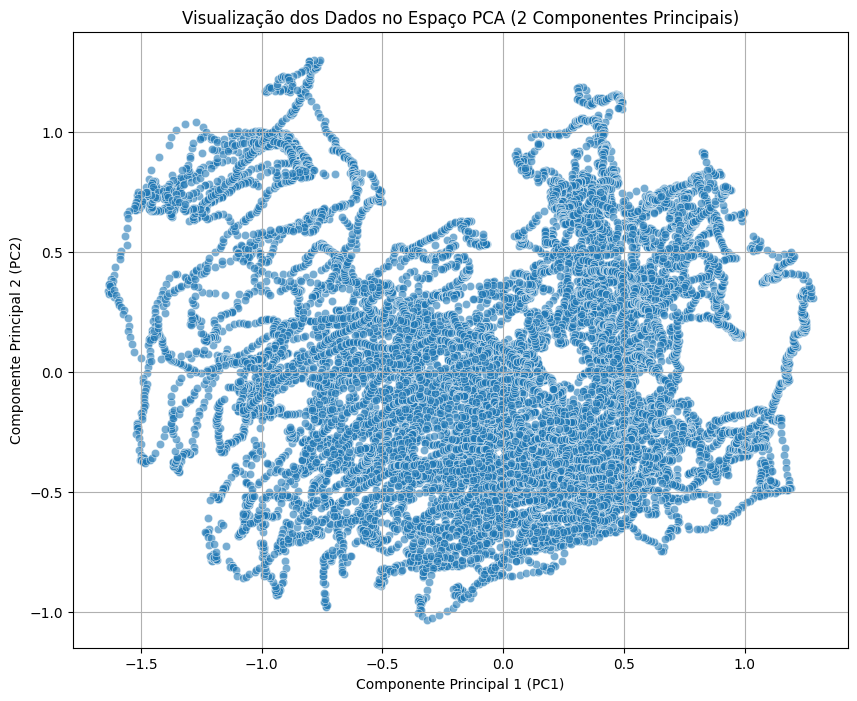

In [31]:
#Exercício: 30

colunas_num_df2 = df2.select_dtypes(include=np.number).columns
X = df2[colunas_num_df2]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df2_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=df2.index)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df2_pca, alpha=0.6)
plt.title('Visualização dos Dados no Espaço PCA (2 Componentes Principais)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()

Observando o gráfico, parece haver uma concentração de pontos na região central, com alguns pontos mais dispersos ao redor. Não há agrupamentos distintos e bem separados, o que sugere que, com apenas 2 componentes principais, não identificamos padrões ou agrupamentos naturais claros nos dados.

In [32]:
#Exercício: 31

var_ambientes = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                          'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                          'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

target = 'Appliances'

X = df2[var_ambientes]
y = df2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_reg_mutipla = LinearRegression()
modelo_reg_mutipla.fit(X_train, y_train)

y_pred_multipla = modelo_reg_mutipla.predict(X_test)

mse_multipla = mean_squared_error(y_test, y_pred_multipla)
rmse_multipla = np.sqrt(mse_multipla)
r2_mutipla = r2_score(y_test, y_pred_multipla)

print("Avaliação do Modelo de Regressão Linear Múltipla:")
print(f"Erro Quadrático Médio (MSE): {mse_multipla:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_multipla:.4f}")
print(f"Coeficiente de Determinação (R²): {r2_mutipla:.4f}")

Avaliação do Modelo de Regressão Linear Múltipla:
Erro Quadrático Médio (MSE): 0.0077
Raiz do Erro Quadrático Médio (RMSE): 0.0875
Coeficiente de Determinação (R²): 0.1492


In [33]:
#Exercício: 32

colunas_preditoras = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                          'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                          'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

target = 'Appliances'

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
rmse_rf = r2_score(y_test, y_pred_rf)

print("\nAvaliação do Modelo Random Forest Regressor:")
print(f"Erro Quadrático Médio (MSE): {mse_rf:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.4f}")

print("\nComparação do RMSE:")
print(f"RMSE Regressão Linear: {rmse_multipla:.4f}")
print(f"RMSE Random Forest: {rmse_rf:.4f}")


Avaliação do Modelo Random Forest Regressor:
Erro Quadrático Médio (MSE): 0.0038
Raiz do Erro Quadrático Médio (RMSE): 0.5728

Comparação do RMSE:
RMSE Regressão Linear: 0.0875
RMSE Random Forest: 0.5728



=== K-Means com 3 clusters ===


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Consumo_Perfil
Cluster_3,,,,,,,,,,,,,,,,,,,,,
0,0.690705,0.391659,0.473839,0.554091,0.602902,0.471624,0.718529,0.498419,0.598491,0.300754,...,0.715942,0.518090,0.583151,0.585359,0.599717,0.268040,0.553734,0.622306,0.091496,Alto
1,0.443805,0.296868,0.208481,0.529565,0.348493,0.402322,0.452963,0.362090,0.333458,0.292361,...,0.410385,0.410880,0.285288,0.641755,0.766507,0.231026,0.580474,0.339479,0.076176,Baixo
2,0.428952,0.455638,0.280824,0.629961,0.320878,0.677521,0.381466,0.699779,0.297321,0.387854,...,0.296484,0.697398,0.373826,0.581526,0.845792,0.423701,0.589538,0.512633,0.080432,Médio


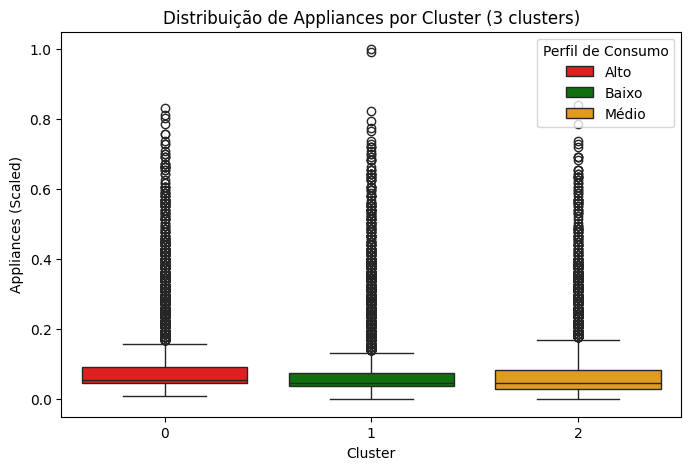


=== K-Means com 4 clusters ===


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Consumo_Perfil
Cluster_4,,,,,,,,,,,,,,,,,,,,,
0,0.760086,0.470504,0.513975,0.642230,0.687911,0.555847,0.788417,0.617174,0.681240,0.334882,...,0.810771,0.640791,0.625006,0.536434,0.702437,0.224060,0.539707,0.755038,0.087005,Médio
1,0.429695,0.459039,0.282994,0.632158,0.321589,0.683117,0.380985,0.707005,0.298524,0.390387,...,0.295738,0.705064,0.377830,0.586300,0.843791,0.430980,0.585940,0.516996,0.080728,Baixo
2,0.424352,0.302558,0.189395,0.540639,0.329834,0.418375,0.430367,0.374092,0.317951,0.303276,...,0.384773,0.425674,0.253761,0.624350,0.812522,0.212162,0.596204,0.325791,0.072489,Baixo
3,0.584144,0.306376,0.378625,0.481237,0.483043,0.381057,0.607900,0.369606,0.470780,0.264473,...,0.578841,0.391722,0.491051,0.652100,0.544795,0.306505,0.553425,0.462264,0.093323,Alto


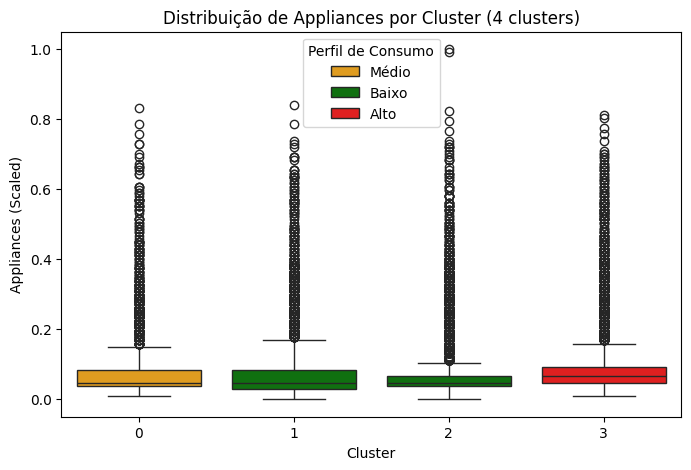


=== K-Means com 5 clusters ===


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Consumo_Perfil
Cluster_5,,,,,,,,,,,,,,,,,,,,,
0,0.606081,0.280248,0.425859,0.424635,0.485892,0.354001,0.639296,0.327893,0.477610,0.251947,...,0.590719,0.364286,0.525624,0.685339,0.453766,0.307210,0.558525,0.437344,0.098263,Alto
1,0.425760,0.461834,0.283803,0.631018,0.315204,0.690910,0.378517,0.713391,0.293267,0.393262,...,0.286252,0.712489,0.374436,0.591935,0.845428,0.427633,0.583804,0.513249,0.080128,Médio
2,0.394016,0.292122,0.181836,0.514805,0.289627,0.415435,0.403707,0.353099,0.275714,0.311991,...,0.335525,0.407058,0.230296,0.626713,0.788744,0.223260,0.609500,0.278691,0.076850,Baixo
3,0.803360,0.492551,0.566362,0.644237,0.721097,0.577802,0.829856,0.649762,0.725912,0.340553,...,0.851563,0.660325,0.666035,0.539475,0.674484,0.231428,0.556784,0.792520,0.091072,Alto
4,0.550003,0.362617,0.271642,0.617695,0.490821,0.449300,0.551562,0.470326,0.471917,0.292166,...,0.573076,0.493991,0.403587,0.580993,0.804735,0.246818,0.542448,0.529162,0.072847,Baixo


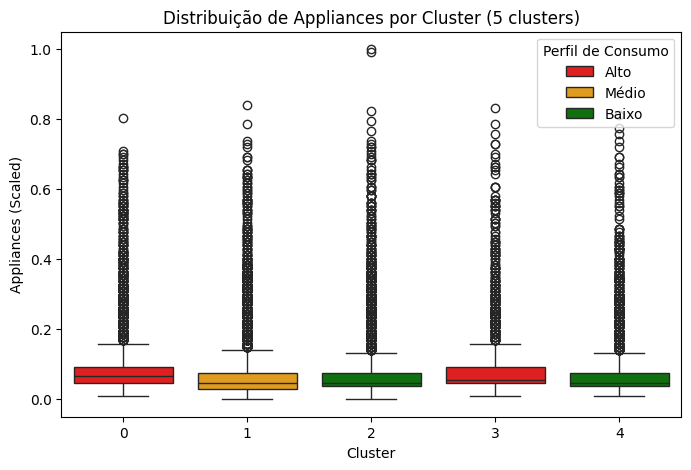

In [35]:
#Exercício: 33

cluster_colunas = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
                   'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
                   'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
                   'Windspeed', 'Visibility', 'Tdewpoint']

X_clustering = df2[cluster_colunas]

for n_clusters in range(3, 6):
    print(f'\n=== K-Means com {n_clusters} clusters ===')

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df2[f'Cluster_{n_clusters}'] = kmeans.fit_predict(X_clustering)

    cluster_profiles = df2.groupby(f'Cluster_{n_clusters}')[cluster_colunas + [target]].mean()
    cluster_profiles['Consumo_Perfil'] = pd.qcut(cluster_profiles[target], 3, labels=['Baixo', 'Médio', 'Alto'])
    display(cluster_profiles)

    # Adicionar perfil de consumo ao dataframe original
    perfil_map = cluster_profiles['Consumo_Perfil'].to_dict()
    df2[f'Perfil_{n_clusters}'] = df2[f'Cluster_{n_clusters}'].map(perfil_map)

    # Boxplot com hue = perfil
    plt.figure(figsize=(8,5))
    sns.boxplot(
        x=f'Cluster_{n_clusters}',
        y=target,
        hue=f'Perfil_{n_clusters}',
        data=df2,
        palette={'Baixo':'green', 'Médio':'orange', 'Alto':'red'}
    )
    plt.title(f'Distribuição de {target} por Cluster ({n_clusters} clusters)')
    plt.xlabel('Cluster')
    plt.ylabel(f'{target} (Scaled)')
    plt.legend(title='Perfil de Consumo')
    plt.show()


In [ ]:
#Exercício: 34

media_appliances = df2['Appliances'].median()
df2['High_Consumption'] = (df2['Appliances'] > media_appliances).astype(int)

var_preditoras = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
                       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
                       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']

X = df2[var_preditoras]
y = df2['High_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

modelo_lr = LogisticRegression(random_state=42, solver='liblinear')
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

print('\nLogisticRegression')
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")

modelo_rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_class.fit(X_train, y_train)
y_pred_rf_class = modelo_rf_class.predict(X_test)

print('\nRandomForestClassifier')
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_class):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_class):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_class):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_class):.4f}")

In [ ]:
#Exercício: 35

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de Confusão (Logistic Regression):")
print(cm_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'], yticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Logistic Regression')
plt.show()

print(f'Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}')
print(f'Precisão: {precision_score(y_test, y_pred_lr):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_lr):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_lr):.4f}')



In [ ]:
#Exercício: 35

print("--- Avaliação Detalhada do Modelo Logistic Regression ---")

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de Confusão (Logistic Regression):")
print(cm_lr)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'], yticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Logistic Regression')
plt.show()


print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")


print("\n--- Avaliação Detalhada do Modelo Random Forest Classifier ---")

cm_rf = confusion_matrix(y_test, y_pred_rf_class)
print("Matriz de Confusão (Random Forest Classifier):")
print(cm_rf)


plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'], yticklabels=['Baixo Consumo (0)', 'Alto Consumo (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_class):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_class):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_class):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf_class):.4f}")


##Análise de Erros
Observando as matrizes de confusão:
- Logistic Regression errou mais ao prever 'Alto Consumo' como 'Baixo Consumo'. Falso Negativo: valor inferior esquerdo na matriz.

- Random Forest Classifier, embora tenha um desempenho geral melhor, também comete mais erros do tipo Falso Negativo prever 'Alto Consumo' como 'Baixo Consumo' em comparação com Falso Positivo. Portanto, ambos os modelos tendem a errar mais ao classificar instâncias de ALTO consumo como sendo de baixo consumo Falsos Negativos.